The dataset used in the current data analysis, modelling and visualization project is downloaded from the John Hopkins University COVID-19 dataset, which is a time series dataset starting from the period 22nd January 2020 to present day (2nd December 2021) (time_series_covid19_confirmed_global.csv). 
The dataset consists of four key columns (Province/State, Country/Region, Latitude, and Longitude), and then series of column with the individual column indicating the COVID-19 confirmed cases added as separate columns added one each day. 
In the report, an analysis of the time_series_covid19_confirmed_global dataset for the understanding the COVID-19 infection in Top three countries, and its visualization of the dataset. 


List of libraries selected for the predictive modelling are shown below:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp


The COVID-19 confirmed cases global dataset is imported into the Python IDE:

In [ ]:
covid_data=pd.read_csv('/content/sample_data/time_series_covid19_confirmed_global.csv')

The above step removes the columns Province/State, Lat, and Long from the imported COVID-19 dataset. 



In [ ]:
covid_data = covid_data.drop(columns=['Province/State','Lat','Long'])

print(covid_data)

         Country/Region  1/22/20  1/23/20  ...  11/30/21  12/01/2021  12/02/2021
0           Afghanistan        0        0  ...    157289      157359      157387
1               Albania        0        0  ...    199945      200173      200639
2               Algeria        0        0  ...    210531      210723      210921
3               Andorra        0        0  ...     17115       17426       17658
4                Angola        0        0  ...     65168       65183       65208
..                  ...      ...      ...  ...       ...         ...         ...
275             Vietnam        0        2  ...   1238082     1252590     1266288
276  West Bank and Gaza        0        0  ...    460053      460799      461157
277               Yemen        0        0  ...     10004       10006       10006
278              Zambia        0        0  ...    210169      210195      210220
279            Zimbabwe        0        0  ...    134625      135337      136379

[280 rows x 682 columns]


The above process involves identification of the column/region as the index column, and then transpose of the dataset to indicate the data along the individual rows of the dataset. 

In [ ]:
covid_data.set_index("Country/Region",inplace=True)
covid_data = covid_data.T


In [ ]:
print(covid_data)

Country/Region  Afghanistan  Albania  Algeria  ...  Yemen  Zambia  Zimbabwe
1/22/20                   0        0        0  ...      0       0         0
1/23/20                   0        0        0  ...      0       0         0
1/24/20                   0        0        0  ...      0       0         0
1/25/20                   0        0        0  ...      0       0         0
1/26/20                   0        0        0  ...      0       0         0
...                     ...      ...      ...  ...    ...     ...       ...
11/28/21             157218   199555   210152  ...   9987  210143    133951
11/29/21             157260   199750   210344  ...   9995  210150    134226
11/30/21             157289   199945   210531  ...  10004  210169    134625
12/01/2021           157359   200173   210723  ...  10006  210195    135337
12/02/2021           157387   200639   210921  ...  10006  210220    136379

[681 rows x 280 columns]


In [ ]:
covid_data = covid_data.sort_values(by=covid_data.index.values[-1], axis=1, ascending=False)
covid_data = covid_data.iloc[:,0:3]

In [ ]:
print(covid_data)

Country/Region        US     India    Brazil
1/22/20                1         0         0
1/23/20                1         0         0
1/24/20                2         0         0
1/25/20                2         0         0
1/26/20                5         0         0
...                  ...       ...       ...
11/28/21        48241903  34580832  22080906
11/29/21        48438876  34587822  22084749
11/30/21        48555974  34596776  22094459
12/01/2021      48691353  34606541  22105872
12/02/2021      48832228  34615757  22118782

[681 rows x 3 columns]


The pre-processing steps involves the conversion of the column identified as ‘Index’ as the datatime value using the type conversion datatime64[ns], and then assigning the column name as ‘Day.’ 

Then, use the resample function in the DataFrame by dividing the daily data into weekly statistics by using ‘7D’ function parameter, and then aggregate the data using the function sum(). 
The last row of the dataset is removed as the aggregated dataset has last week with less number of days leading to data error or wrong trend factor. 


In [ ]:
covid_data_dt = pd.to_datetime(covid_data.index)
covid_data_dt = covid_data_dt.astype('datetime64[ns]')
covid_data = covid_data.set_index(covid_data_dt)
covid_data.index.name = "Day"

covid_data = covid_data.resample('7D').sum()
covid_data = covid_data.iloc[:-1,:]

In [ ]:
print(covid_data)

Country/Region         US      India     Brazil
Day                                            
2020-01-22             21          0          0
2020-01-29             58         11          0
2020-02-05             84         21          0
2020-02-12             97         21          0
2020-02-19            108         21          0
...                   ...        ...        ...
2021-10-27      321870069  239901927  152591771
2021-11-03      325464184  240487650  153085245
2021-11-10      329372239  241049734  153611347
2021-11-17      333926430  241559622  154050418
2021-11-24      337832603  242002015  154502957

[97 rows x 3 columns]


In [ ]:
covid_data['week_number'] = np.arange(len(covid_data))
covid_data['week_number'] = covid_data['week_number']+1


The Covid_Data now is converted into a DataFrame which consists of new column ‘week_number’ and its existing columns are ‘US’, ‘India’, and ‘Brazil.’ 

In [ ]:
covid_data = pd.DataFrame(covid_data, columns=['week_number', 'US', 'India', 'Brazil'])
covid_data.reset_index(drop=True, inplace=True)

In [ ]:
print(covid_data)

    week_number         US      India     Brazil
0             1         21          0          0
1             2         58         11          0
2             3         84         21          0
3             4         97         21          0
4             5        108         21          0
..          ...        ...        ...        ...
92           93  321870069  239901927  152591771
93           94  325464184  240487650  153085245
94           95  329372239  241049734  153611347
95           96  333926430  241559622  154050418
96           97  337832603  242002015  154502957

[97 rows x 4 columns]


Classification of the Covid_Data into the independent values and dependent values and assigning the independent values to variable ‘y’, and assigning the dependent values to variable ‘x’. 

In [ ]:
X=np.array(covid_data['week_number'].index.values, dtype=int)

In [ ]:
y=np.array(covid_data['US'].values, dtype=int)

r =  0.9796116477576725 
 p =  5.057017539057331e-68 
 s =  83353.75894764392


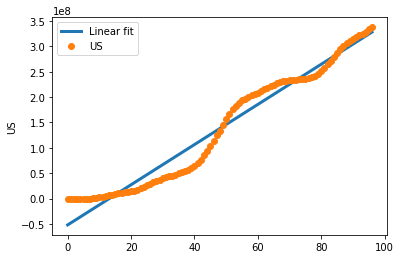

In [ ]:
slope, intercept, r_value, p_value, std_err =sp.linregress(X,y)

xf = np.linspace(min(X),max(X),100)
xf1 = xf.copy()
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
covid_data['US'].plot(ax=ax,marker='o', ls='')
plt.ylabel('US')
ax.legend();

The blue line is the linear regression line which is closely following the trend of the movement of COVID-19 confirmed cases in US. 

In [ ]:
X=np.array(covid_data['week_number'].index.values, dtype=int)

In [ ]:
y=np.array(covid_data['Brazil'].values, dtype=int)

r =  0.9822898787644818 
 p =  6.69107843654955e-71 
 s =  38046.111831757655


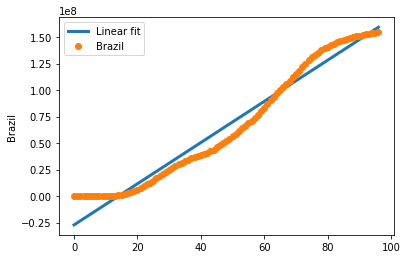

In [ ]:
slope, intercept, r_value, p_value, std_err =sp.linregress(X,y)

xf = np.linspace(min(X),max(X),100)
xf1 = xf.copy()
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
covid_data['Brazil'].plot(ax=ax,marker='o', ls='')
plt.ylabel('Brazil')
ax.legend();

In [ ]:
X=np.array(covid_data['week_number'].index.values, dtype=int)

In [ ]:
y=np.array(covid_data['India'].values, dtype=int)

r =  0.9527561705932089 
 p =  5.883998445218668e-51 
 s =  100433.02909032162


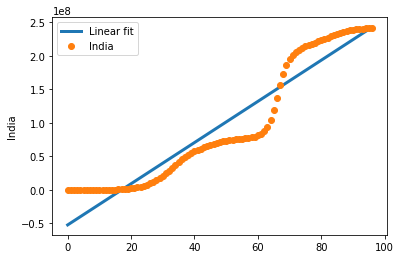

In [ ]:
slope, intercept, r_value, p_value, std_err =sp.linregress(X,y)

xf = np.linspace(min(X),max(X),100)
xf1 = xf.copy()
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
covid_data['India'].plot(ax=ax,marker='o', ls='')
plt.ylabel('India')
ax.legend();

From the linear regression model constructed in the above plots showing the comparison of the linear fit (linear regression) and the scatter plot showing the number of the COVID-19 confirmed cases, the Brazil plot has the lower standard error than the US plot and the India plot. 

The r-value in the above plot indicate the measure of the correlation coefficient which is positive and close to 1 indicating that the strong correlation between the week number and increase of the covid cases. Brazil has stronger r-value indicating that it is closer to the regression line. 

The standard error (s-value) indicate the higher level of variances among the datasets (US, Brazil, and India). 
It can be inferred that the India has higher s-value (standard error) of 100433 compared to the standard error of US of 83353, and the standard error of Brazil of 38046.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize

The new libraries imported into the model are the sklearn are the KMeans, StandardScalar, and Normalize functions. 

The pre-processed and prepared data of the previous modelling technique (linear regression) has been used to determine that the variance of the regression is highest for the country (India) which is identified by the standard error measure. 

Now, the k-Means clustering model is implemented to validate the higher variance in the dataset of the COVID-19 confirmed cases of the India. 

For that, only the India cases and week number are filtered from the data frame. The measure of the cumulative sum is reversed by finding the difference between the current row and existing row. Any null value is observed in the process is replaced with the zero value. 


In [ ]:
selected_cols = ["week_number","India"]
cluster_data = covid_data.loc[:,selected_cols]
cluster_data["India"] = cluster_data["India"].diff()
cluster_data = cluster_data.fillna(0)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)
clusters_range = range(2,15)
inertias = []

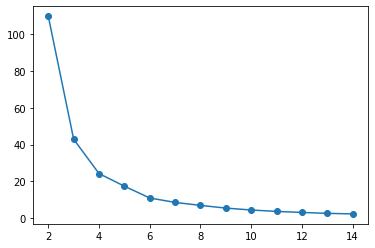

In [ ]:
for c in clusters_range:
  kmeans = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0).fit(scaled_features)
  inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertias, marker='o')
plt.show()

The K-means function is called with the parameter k-means++ with the number of clustered ranging from 2 to 15.  There is huge reduction in variation with K=6, after variation doesn’t go down so quickly, it is called “elbow plot”, and we use to pick K – by finding the “elbow” in the plot.
From the iteration process, the number of clusters finalized for 6, and the cluster count is used to build the K-means clustering. 



In [ ]:
kmeans_sel = KMeans(init='k-means++',n_clusters=6, n_init=100, random_state=1).fit(scaled_features)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)
print(clustered_data)



    week_number     India  Cluster
0             1       0.0        1
1             2      11.0        1
2             3      10.0        1
3             4       0.0        1
4             5       0.0        1
..          ...       ...      ...
92           93  688582.0        0
93           94  585723.0        0
94           95  562084.0        0
95           96  509888.0        0
96           97  442393.0        0

[97 rows x 3 columns]


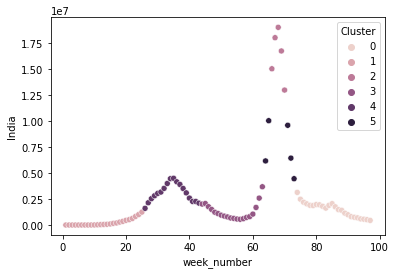

In [ ]:
sns.scatterplot(x="week_number", y="India", hue="Cluster", data=clustered_data)

The scatter plot showing the relationship between the week_number and number of COVID-19 infections, which are shown in 6 different clusters indicated by the variation of the colour of the cluster members. 

In [ ]:
grouped_us = clustered_data.groupby(['Cluster']).mean().round(2)
grouped_us


,week_number,India
Cluster,,
0,85.5,1501296.67
1,13.0,238108.92
2,68.0,16360593.80
3,53.5,1292318.65
4,34.5,3093353.89
5,69.0,7337692.00


The table is calculated to indicate the average value of the cluster columns, week_number and number of COVID cases in country, which helps to indicate the average week number and pattern of cluster formation. 

Analysis: The country India has the highest variation of the COVID-19 infection among the three top ranked countries in terms of the number of the infections. The above k-Means clustering groups the dataset into six different clusters (0, 1, 2, 3, 4, and 5), which are identified in the scatter plot as different colours. Clearly, the six different clusters are formed within specific time period and there is specific pattern of the relationship among the members of the clusters.

For instance, the first cluster having lower number of infections was Cluster 1 and it was identified during the first 13 weeks of the COVID-19 period. The country was not infected much during the initial period and number of infections reported were also lowest, it was 238108 cases. Then, the higher number of infections was around 16,36 million in the Cluster 2 in week 68 of the COVID-19 period. We can say, India was the most affected during the second COVID-19 wave.



In [ ]:
import networkx as nx

For the purpose of the Graph Analysis, a neighbourhood table is constructed which shows the details of the countries, and their neighbourhood countries along with the distance between the two countries which is calculated using the latitude and longitude.

In [ ]:
G = nx.read_weighted_edgelist('/content/sample_data/neighbourhood_matrix.txt')
print(G)

Graph with 33 nodes and 33 edges


In [ ]:
covid_data= pd.read_csv('/content/sample_data/time_series_covid19_confirmed_global.csv')
covid_data = covid_data.drop(columns=['Province/State','Lat','Long'])
covid_data.set_index("Country/Region",inplace=True)
covid_data = covid_data['11/28/21']
covid_data.columns = ['Country/Region', '11/28/21']

The dataset time_series_covid19_confirmed_global.csv is uploaded into the model, and same pre-processing steps involves the removal of specific columns, definition of the index, and selecting the particular period of COVID19 confirmed case data. The oldest period will provide the cumulative position of the confirmed cases infection, and therefore, 11/28/21 date COVID-19 infection is selected.

In [ ]:
covid_data_dict = covid_data.to_dict()

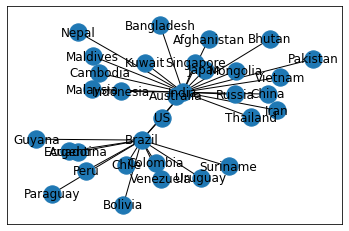

In [ ]:
for i in list(G.nodes()):
    G.nodes[i]['Confirmed Cases'] = covid_data_dict[i]

nx.draw_networkx(G, with_labels=True)

The graph network is plotted with the function draw_networks(), with the network object G and the display of the labels is set to True.

The visualization can be formatted with the better degree using the features and options available in the networkx library.

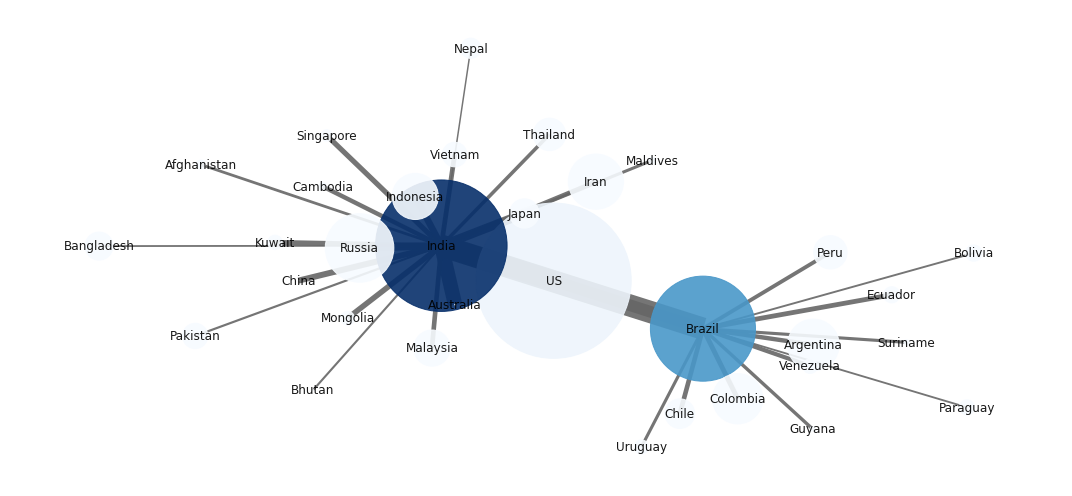

In [ ]:
plt.figure(figsize =(15, 7))
  
node_color = [G.degree(v) for v in G]
node_size = [0.0005 * nx.get_node_attributes(G, 'Confirmed Cases')[v] for v in G]
edge_width = [0.0015 * G[u][v]['weight'] for u, v in G.edges()]

  
nx.draw_networkx(G, node_size = node_size, 
                 node_color = node_color, alpha = 0.9,
                 with_labels = True, width = edge_width,
                 edge_color ='.4', cmap = plt.cm.Blues)
  
plt.axis('off')
plt.tight_layout();

The graph analysis involves the analysis of the network diagram showing the neighbourhood countries related to India and Brazil, which we selected in neighbourhood matrix and model.

The nodes in the network diagram represents the name of the countries, the lines indicate distance between selected countries related to the India, US and Brazil - which are the most infected countries. Number of confirmed cases indicated by size and color of bars.

We can infer that the countries which are boundaries to the India and Brazil, have lower number of infections than three top infected countries. 

In the graph network of COVID-19 are related with the confirmed cases, network diagram indicates the relationship between the countries through the connecting edge line. 

We can say, the information obtained is that Indian and Brazilian neighbours are not as infected as the countries, and it can indicate the fact that India and Brazil can also be source of infection to the neighbouring countries as the graph analysis indicate.

In [ ]:
!pip install plotly

In [ ]:
!pip install matplotlib

Pie Chart:

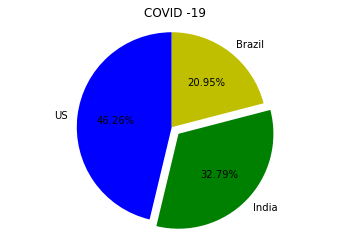

In [ ]:
import matplotlib.pyplot as plt

labels = ['US', 'India', 'Brazil']
sections = [48832228, 34615757, 22118782]
colors = ['b', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') 
plt.title('COVID -19')
plt.show()

The Pie chart visuals shows the distribution of the COVID-19 infection among the top three countries. Most of the cases are linked with the country US, followed by India, and then Brazil.

Bar Chart:

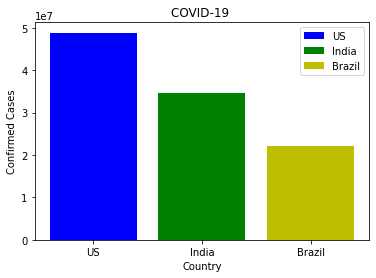

In [ ]:
import matplotlib.pyplot as plt

x1 = ['US']
y1 = [48832228]

x2 = ['India']
y2 = [34615757]

x3 = ['Brazil']
y3 = [22118782]


plt.bar(x1, y1, label="US", color='b')
plt.bar(x2, y2, label="India", color='g')
plt.bar(x3, y3, label="Brazil", color='y')
plt.plot()

plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 ")
plt.legend()
plt.show()

The variety of visualization in Python drive the fact that the US COVID-19 confirmed cases are higher than the other countries of the world including India, and Brazil.

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df['text'] = df['Country'] + " " + df["4/13/20"].astype(str)
fig = go.Figure(data = go.Scattergeo(
    lon = df["Long"],
    lat = df["Lat"],
    text = df["text"],
    mode = "markers",
    marker = dict(
        size = 12,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = True,
        symbol = 'square',
        line = dict(
            width = 1,
            color = 'rgba(102, 102, 102)'
        ),
        cmin = 0,
        color = df['4/13/20'],
        cmax = df['4/13/20'].max(),
        colorbar_title = "COVID 19 Reported Cases"
    )
))

fig.update_layout(
    title = "COVID19 Confirmed Cases",
    geo = dict(
        scope = "world",
        showland = True,
    )
)

fig.write_html('first_figure.html', auto_open=True)
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("/content/sample_data/time_series_covid19_confirmed_global.csv")
df = df.rename(columns= {"Country/Region" : "Country", "Province/State": "Province"})

total_list = df.groupby('Country')['12/15/20'].sum().tolist()

country_list = df["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    colorbar_title = 'Reported Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Covid-19 Cases',
    geo=dict(
        showcoastlines=True,
    ),
)

fig.write_html('first_figure.html', auto_open=True)
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("/content/sample_data/time_series_covid19_confirmed_global.csv")
df = df.rename(columns= {"Country/Region" : "Country", "Province/State": "Province"})

total_list = df.groupby('Country')['8/13/21'].sum().tolist()

country_list = df["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    colorbar_title = 'Reported Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Covid-19 Cases',
    geo=dict(
        showcoastlines=True,
    ),
)

fig.write_html('first_figure.html', auto_open=True)
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv("/content/sample_data/time_series_covid19_confirmed_global.csv")
df = df.rename(columns= {"Country/Region" : "Country", "Province/State": "Province"})

total_list = df.groupby('Country')['11/28/21'].sum().tolist()

country_list = df["Country"].tolist()
country_set = set(country_list)
country_list = list(country_set)
country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, total_list)), 
               columns =['Country', 'Total_Cases'])

colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Total_Cases'],
    text = new_df['Total_Cases'],
    colorscale = colors,
    autocolorscale=False,
    reversescale=False,
    colorbar_title = 'Reported Covid-19 Cases',
))

fig.update_layout(
    title_text='Reported Covid-19 Cases',
    geo=dict(
        showcoastlines=True,
    ),
)

fig.write_html('first_figure.html', auto_open=True)
fig.show()

In these 4 different graphs we change the dates 4/13/20 next 12/15/20, after 8/13/21 and last one was 11/28/21. We can see different colour how time pass and we see line with maximum cases, which in first graph showed maximum confirmed cases around 600000 in US, in 12/15/20, after 8 months – maximum confirmed cases were over 16 million, in next 8 months  8/13/21 it was around 35 million and few days ago 11/28/21  in duration of 3,5 months it showed over 46 million. It means the number of cases grow for first 11 month over 16 million, next addition is 19 million in 8-month, next addition in 3.5 month is equal 11 million. Number of confirmed cases are high. But we can see that neighbourhood of investigated countries, don't have so high level of confirmed cases. Advice neighbouring countries include: make sure if situation will escalate again  - close the boarders, if there is necessity to make border open - make sure to test and control everyone who is going through. Every country - government have to protect their own people, even if some ways not popular, like self-isolation.